In [1]:
%pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 72.1 MB/s eta 0:00:00


In [2]:
import cv2
import re
import rasterio
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the image
image = cv2.imread('/content/drive/MyDrive/RS_Lab/5/LC08_L1TP_144039_20250313_20250313_02_RT_B2.TIF')

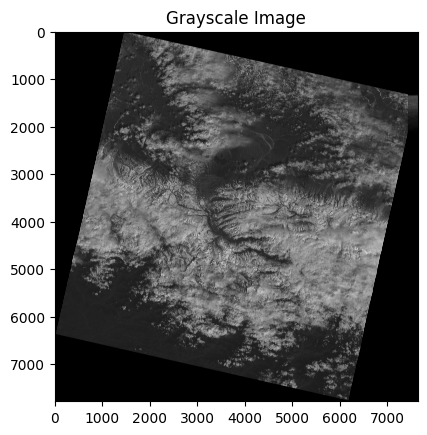

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')

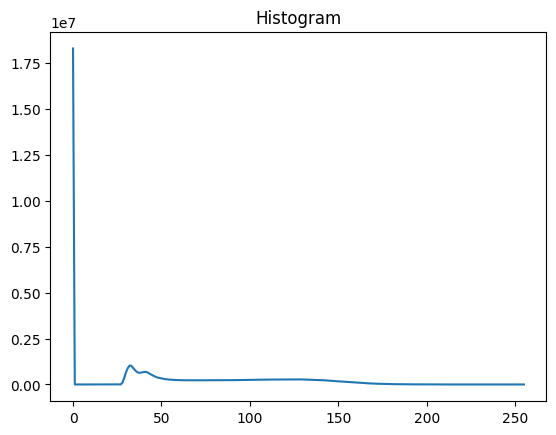

In [6]:
# Calculate and plot histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histogram")
plt.plot(hist)

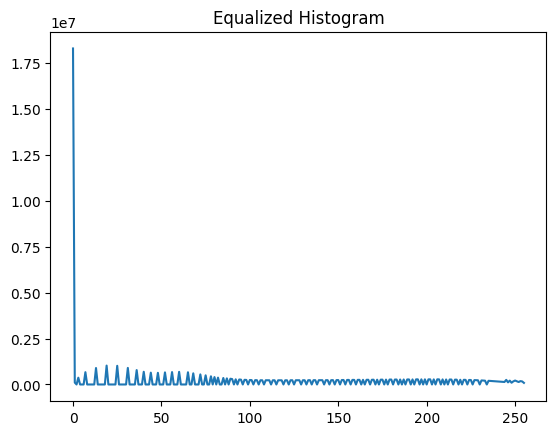

In [7]:
# Histogram equalization
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure()
plt.title("Equalized Histogram")
plt.plot(hist_eq)


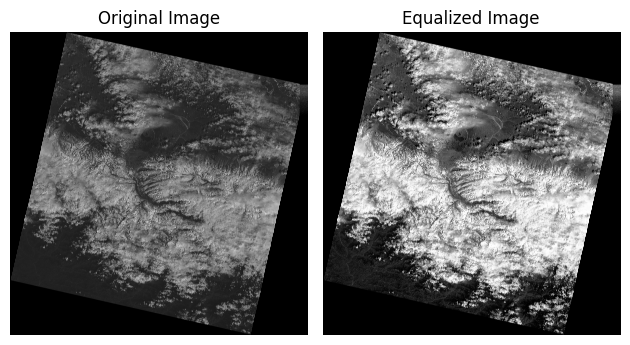

In [8]:
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


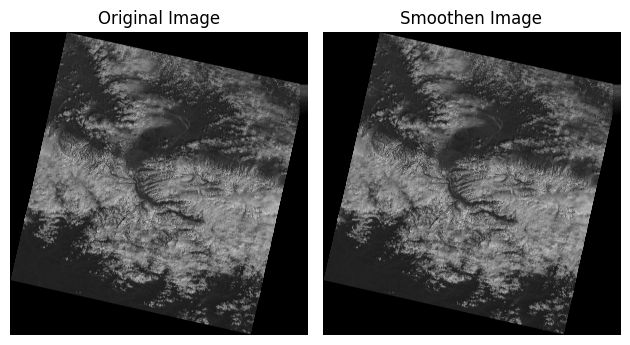

In [9]:
# Gaussian blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Smoothen Image")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

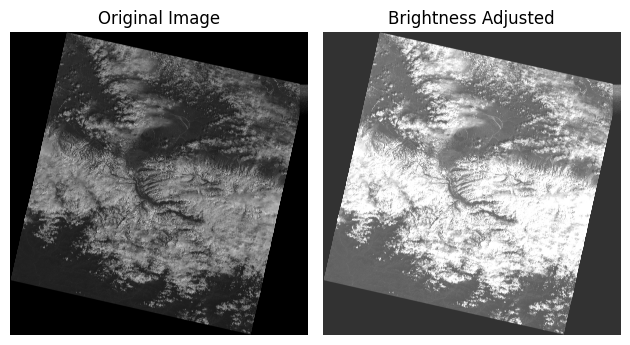

In [12]:
# Smooth using convertScaleAbs
# New pixel = alpha × original + beta
bright_contrast = cv2.convertScaleAbs(image, alpha=1.5, beta=50)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Brightness Adjusted")
plt.imshow(bright_contrast, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


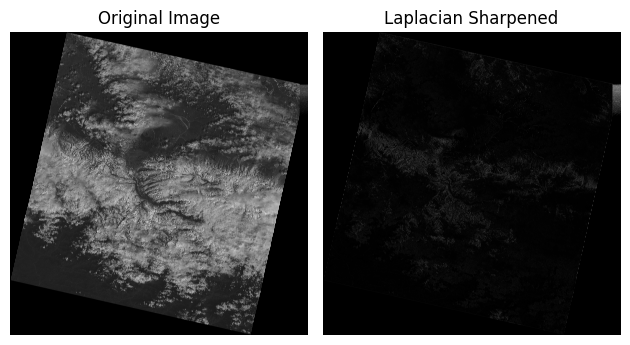

In [11]:
# Laplacian sharpening
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
#detects edges by computing the second derivative
laplacian_abs = cv2.convertScaleAbs(laplacian)  # Convert to 8-bit for proper display

# Save the sharpened image (optional)
cv2.imwrite("laplacian_sharpened.png", laplacian_abs)

# Display side-by-side
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')  # Use gray if you're comparing to the Laplacian of gray
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Laplacian Sharpened")
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
